# Alignment

In [2]:
# I have a docs
# I have imagery



In [1]:
import os, sys
from pathlib import Path
from typing import List

import pandas as pd
import geopandas as gpd

In [2]:
dir_path = Path(os.getcwd()).parent.parent

# Universe
UNIVERSE_PATH = dir_path / 'src/streetTransformer/data/universes/caprecon3'

# Documents
DOCUMENTS_PATH = dir_path.parent / 'proj_data/project_documents/'
documents_df = pd.read_csv(DOCUMENTS_PATH / 'projects_df.csv', index_col=0)

# Imagery
IMAGERY_PATH = UNIVERSE_PATH / 'imagery/'

# Locations
LOCATIONS_PATH = UNIVERSE_PATH / 'locations.feather'



locations_gdf = gpd.read_feather(LOCATIONS_PATH)
#os.listdir(IMAGERY_PATH)

os.listdir(IMAGERY_PATH / '2006')


['38678.png',
 '82496.png',
 '88805.png',
 '9065437.png',
 '79624.png',
 '36127.png',
 '69345.png',
 '9060215.png',
 '21473.png',
 '21467.png',
 '27770.png',
 '9037359.png',
 '8808.png',
 '33936.png',
 '36696.png',
 '41378.png',
 '14437.png',
 '12052.png',
 '90723.png',
 '22191.png',
 '21498.png',
 '89514.png',
 '80256.png',
 '18557.png',
 '36872.png',
 '9052502.png',
 '55457.png',
 '15073.png',
 '88622.png',
 '7534.png',
 '93202.png',
 '79803.png',
 '44228.png',
 '108718.png',
 '38693.png',
 '36866.png',
 '28480.png',
 '108297.png',
 '93799.png',
 '39764.png',
 '18972.png',
 '18966.png',
 '9928.png',
 '9053393.png',
 '29205.png',
 '35604.png',
 '9002692.png',
 '19488.png',
 '102786.png',
 '23700.png',
 '65999.png',
 '78076.png',
 '27572.png',
 '9059682.png',
 '35610.png',
 '9002686.png',
 '19477.png',
 '26687.png',
 '23933.png',
 '15259.png',
 '24084.png',
 '9051221.png',
 '26693.png',
 '30797.png',
 '9050671.png',
 '46629.png',
 '43751.png',
 '15271.png',
 '9047319.png',
 '48610.png'

In [ ]:
# import json
#documents_geocode = pd.read_json(dir_path / 'gemini_output.ndjson', lines=True)#.set_index('id')
PATH = 'gemini_output.ndjson'
dir_path / 

# cleaned_text = documents_geocode.set_index('id')['text'].str.replace('  ', '').str.replace('\n', '')
# temp_df = pd.DataFrame(cleaned_text.apply(load_json)[13])

# temp_df[['lat','lng']] = pd.DataFrame(temp_df['coordinates'].tolist(), index=temp_df.index)
# gpd.GeoDataFrame(temp_df, geometry=gpd.points_from_xy(temp_df['lat'], temp_df['lng'], crs='4326'))


PosixPath('/Users/jon/Documents/Employment/2025 VIDA Lab/streetTransformer/gemini_output.ndjson')

In [3]:
import json
import numpy as np
import pandas as pd
import geopandas as gpd

def _load_json_safe(x):
    try: 
        return json.loads(x)
    except Exception as e:
        #print(x, e)
        return ''

s = (
    documents_geocode['text']
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)
parsed_json = s.apply(_load_json_safe)

# Flatten list-like JSONs into one long Series of dicts
flat = (
    parsed_json.dropna()
          .map(lambda v: v if isinstance(v, (list, tuple)) else [v])
          .explode()
)

location_id = flat.index
temp_df = pd.json_normalize(flat)

coordinates_df = pd.DataFrame(
    temp_df.dropna(subset='coordinates')['coordinates'].tolist(),
    index=temp_df.dropna(subset='coordinates').index, 
    columns=['lat','lng']
)

merged_df = temp_df.merge(
    coordinates_df,
    left_index=True, right_index=True,
    how='left'
)

merged_gdf = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df['lat'], merged_df['lng']), crs='4326')

saved_lats = merged_gdf['lat']
swap_latlngs = merged_gdf[saved_lats < 0][['lat','lng']]
# swap_lngs = saved_lngs[saved_lngs < 0]

#merged_gdf.dropna(subset=['lat','lng'])[['lat','lng']]
merged_gdf.loc[swap_latlngs.index, ['lng','lat']] = swap_latlngs.values

#merged_gdf['lng'].hist()
#merged_gdf['lat'].hist()
#merged_gdf[merged_gdf['lat'] < 0]
merged_gdf['geometry'] = gpd.points_from_xy(merged_gdf['lat'], merged_gdf['lng'])
merged_gdf.plot()

NameError: name 'documents_geocode' is not defined

<Axes: >

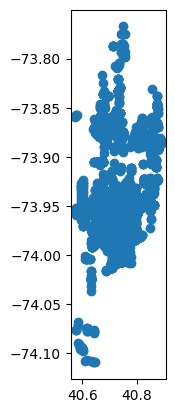

In [ ]:
# This is the real pipeline
def _load_json_safe(x):
    try: 
        return json.loads(x)
    except Exception as e:
        #print(x, e)
        return ''

s = (
    documents_geocode['text']
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)
parsed_json = s.apply(_load_json_safe)


t = pd.DataFrame(parsed_json)
t['id'] = documents_geocode['id']
t = t.set_index('id')

flat = (
    t.dropna()
          .map(lambda v: v if isinstance(v, (list, tuple)) else [v])['text']
          .explode()
)

location_id = flat.index
temp_df = pd.json_normalize(flat)

coordinates_df = pd.DataFrame(
    temp_df.dropna(subset='coordinates')['coordinates'].tolist(),
    index=temp_df.dropna(subset='coordinates').index, 
    columns=['lat','lng']
)

merged_df = temp_df.merge(
    coordinates_df,
    left_index=True, right_index=True,
    how='left'
)

merged_df['location_id'] = location_id
merged_df

merged_gdf = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df['lat'], merged_df['lng']), crs='4326')

saved_lats = merged_gdf['lat']
swap_latlngs = merged_gdf[saved_lats < 0][['lat','lng']]

merged_gdf.loc[swap_latlngs.index, ['lng','lat']] = swap_latlngs.values

merged_gdf['geometry'] = gpd.points_from_xy(merged_gdf['lat'], merged_gdf['lng'])
merged_gdf.plot()


In [35]:
#!pip install folium
# import folium
# from IPython.display import display, HTML

# def folium_deepnote_show(m):
#     data = m.get_root().render()
#     data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
#     display(HTML(data_fixed_height))

# map_center = [float(merged_gdf['lng'].mean()), float(merged_gdf['lat'].mean())]
# map_center
# m = folium.Map(location=map_center, zoom_start=13)

# # # Display the map using the custom function
# # documents_df.merge(
# #     merged_gdf,
# #     left_index=True, right_on = 'location_id',
# #     how='left'
# # )

# # merged_gdf.merge(
# #     documents_df,
# #     left_on = 'location_id', right_index=True,
# #     how='right'
# # ).explore(m=m)

# folium_deepnote_show(m)

# import folium
# m = folium.Map(location=[0, 0], zoom_start=2)
# folium_deepnote_show(m)


merged_gdf


,cross_streets,page_found,coordinates,confidence,lat,lng,location_id,geometry
0,"[Bruckner Boulevard, Bronx River Avenue]",1.0,None,4.0,NaN,NaN,0,POINT (NaN NaN)
1,"[Bruckner Expressway, Bronx River Avenue]",2.0,None,4.0,NaN,NaN,0,POINT (NaN NaN)
2,"[Lafayette Avenue, Drake Street]",1.0,None,4.0,NaN,NaN,1,POINT (NaN NaN)
3,"[Lafayette Avenue, Drake Street]",2.0,None,5.0,NaN,NaN,1,POINT (NaN NaN)
4,"[Bolton Avenue, Lafayette Avenue]",4.0,None,5.0,NaN,NaN,2,POINT (NaN NaN)
...,...,...,...,...,...,...,...,...
5066,[27th St],13.0,None,3.0,NaN,NaN,894,POINT (NaN NaN)
5067,[41st St],13.0,None,3.0,NaN,NaN,894,POINT (NaN NaN)
5068,[42nd St],13.0,None,3.0,NaN,NaN,894,POINT (NaN NaN)
5069,[24th St],1.0,None,3.0,NaN,NaN,894,POINT (NaN NaN)


In [37]:
merged_gdf.dropna(subset=['lat','lng'])

,cross_streets,page_found,coordinates,confidence,lat,lng,location_id,geometry
7,"[3rd Ave, 4th Ave, 5th Ave, 6th Ave, 7th Ave, ...",4.0,"[40.6614, -73.9773]",5.0,40.6614,-73.9773,3,POINT (40.6614 -73.9773)
8,"[3rd Ave, 4th Ave, 5th Ave, 6th Ave, 7th Ave, ...",8.0,"[40.6614, -73.9773]",5.0,40.6614,-73.9773,3,POINT (40.6614 -73.9773)
9,[8th Ave],9.0,"[40.6614, -73.9773]",4.0,40.6614,-73.9773,3,POINT (40.6614 -73.9773)
10,[6th Ave],10.0,"[40.6614, -73.9773]",4.0,40.6614,-73.9773,3,POINT (40.6614 -73.9773)
11,"[Columbia St, Smith St, 3rd Ave, 5th Ave]",16.0,"[40.6614, -73.9773]",4.0,40.6614,-73.9773,3,POINT (40.6614 -73.9773)
...,...,...,...,...,...,...,...,...
4875,"[W 31st St, W 35th St]",11.0,"[40.7502, -73.9879]",5.0,40.7502,-73.9879,892,POINT (40.7502 -73.9879)
4876,[W 35th St],11.0,"[40.7573, -73.9855]",4.0,40.7573,-73.9855,892,POINT (40.7573 -73.9855)
4877,[34th St],12.0,"[40.7535, -73.9865]",4.0,40.7535,-73.9865,892,POINT (40.7535 -73.9865)
4878,[38th St],12.0,"[40.7675, -73.9803]",4.0,40.7675,-73.9803,892,POINT (40.7675 -73.9803)


<Axes: >

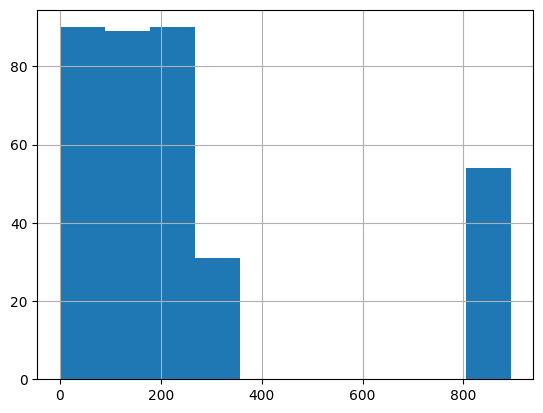

<Axes: >

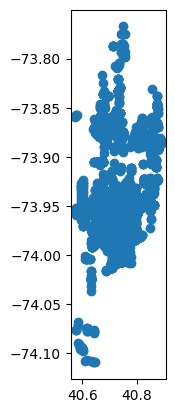

In [ ]:
merged_gdf.dropna(subset=['lat', 'lng']).plot()

In [ ]:
#documents_df.merge(merged_gdf, left_index=True, right_index=True).dropna(subset=['lat','lng'])

RangeIndex(start=0, stop=5071, step=1)

In [ ]:
documents_df

,year,borough,name,document_links,source_url
0,2007,the Bronx,Bruckner-Sheridan Expressway Interchange Enhan...,['http://www.nyc.gov/html/dot/downloads/pdf/br...,https://www.nyc.gov/html/dot/html/about/projec...
1,2007,the Bronx,Edgewater Road Traffic Calming,['http://www.nyc.gov/html/dot/downloads/pdf/ed...,https://www.nyc.gov/html/dot/html/about/projec...
2,2007,the Bronx,Lafayette Avenue Reengineering and Safety Impr...,['http://www.nyc.gov/html/dot/downloads/pdf/la...,https://www.nyc.gov/html/dot/html/about/projec...
3,2007,Brooklyn,9th Street Bicycle and Street Safety Project,['http://www.nyc.gov/html/dot/downloads/pdf/9t...,https://www.nyc.gov/html/dot/html/about/projec...
4,2007,Brooklyn,Carlton Avenue Green Median and Bike Lanes,['http://www.nyc.gov/html/dot/downloads/pdf/ca...,https://www.nyc.gov/html/dot/html/about/projec...
...,...,...,...,...,...
936,2025,Queens,Woodside Avenue Open Street,['https://www.nyc.gov/html/dot/downloads/pdf/w...,https://www.nyc.gov/html/dot/html/about/curren...
937,2025,Staten Island,"Father Capodanno Boulevard, Midland Avenue to ...",['https://www.nyc.gov/html/dot/downloads/pdf/f...,https://www.nyc.gov/html/dot/html/about/curren...
938,2025,Staten Island,"Lincoln Avenue, Father Capodanno Boulevard to ...",['https://www.nyc.gov/html/dot/downloads/pdf/l...,https://www.nyc.gov/html/dot/html/about/curren...
939,2025,Staten Island,"Victory Boulevard, Bay Street to Wild Avenue",['https://www.nyc.gov/html/dot/downloads/pdf/v...,https://www.nyc.gov/html/dot/html/about/curren...


In [2]:
from align_docs_and_projects import pipeline
import os
from pathlib import Path
DIR_PATH = Path(os.curdir).resolve().parent.parent
json_path = DIR_PATH / 'data/project_documents/geocoded' / 'gemini_output2.ndjson'
json_path = DIR_PATH / 'data/project_documents/geocoded' / 'gemini_output.ndjson'
geocoded_documents = pipeline(json_path)
#geocoded_documents[geocoded_documents['lat'] < 40]

/Users/jon/Documents/Employment/2025 VIDA Lab/streetTransformer/data/project_documents/geocoded/gemini_output.ndjson


In [1]:
# Now load locations
import geopandas as gpd
UNIVERSE_PATH = DIR_PATH / 'src/streetTransformer/data/universes/caprecon3'

LOCATIONS_PATH =  UNIVERSE_PATH / 'locations.feather'
locations_gdf_p = gpd.read_feather(LOCATIONS_PATH)

locations_gdf = locations_gdf_p.to_crs('4326')

BUFFER_WIDTH = 50

locations_buffered = locations_gdf_p.buffer(BUFFER_WIDTH)
locations_gdf_p['buffer'] = locations_buffered
locations_gdf_p = locations_gdf_p.rename({'NODEID':'location_id'}, axis=1)

joined_docs_locations_gdf = locations_gdf_p.set_geometry('buffer').sjoin(
    geocoded_documents.to_crs(locations_gdf_p.crs)
).rename({'index_right': 'doc_location_id'}, axis=1)

joined_docs_locations_gdf = joined_docs_locations_gdf.rename({
    'coordinates': 'document_coords', 
    'cross_streets': 'location_cross_streets',
    'StreetNames': 'document_cross_streets'}, axis=1)
joined_docs_locations_gdf[[
    'location_id', 'document_id', 'doc_location_id', # IDs
    'location_cross_streets', 'document_street_names', 
    'geometry','buffer','document_coords' # geometries
]]


# geocoded_documents.to_crs(locations_gdf_p.crs).plot()
# locations_gdf_p.to_crs(locations_gdf_p.crs).plot()
# geocoded_documents.to_crs(locations_gdf_p.crs)

geocoded_documents#.explore()

geocoded_documents['geometry'] = (gpd.points_from_xy(geocoded_documents['lng'], geocoded_documents['lat']))

geocoded_documents[
    (geocoded_documents['lat'].notna()) & 
    (geocoded_documents['lng'] < 0) & 
    (geocoded_documents['lat'] > 38) & 
    (geocoded_documents.geometry.is_valid)
].explore()#tiles='CartoDB DarkMatter')

NameError: name 'DIR_PATH' is not defined

In [ ]:
#import os
from pathlib import Path
#from typing  import List

import json
import numpy as np
import pandas as pd
import geopandas as gpd

dir_path = Path(os.path).resolve().parent.parent.parent
print(f'Treating "{dir_path}" as `dir_path')

# Universe
UNIVERSE_PATH = dir_path / 'src/streetTransformer/data/universes/caprecon3'

# Documents
DOCUMENTS_PATH = dir_path.parent / 'proj_data/project_documents/'
documents_df = pd.read_csv(DOCUMENTS_PATH / 'projects_df.csv', index_col=0, na_values='.')

# Imagery
IMAGERY_PATH = UNIVERSE_PATH / 'imagery/'

# Locations
LOCATIONS_PATH = UNIVERSE_PATH / 'locations.feather'

locations_gdf = gpd.read_feather(LOCATIONS_PATH)
DOCUMENTS_PROCESSED_PATH = dir_path / 'data/project_documents/geocoded'
documents_ndjson = DOCUMENTS_PROCESSED_PATH / 'gemini_output.ndjson'

## Pipeline

# This is the real pipeline
def _load_json_safe(x):
    try: 
        return json.loads(x)
    except Exception as e:
        #print(x, e)
        return ''


def load_documents_geocoded(ndjson_path=documents_ndjson):
    print(ndjson_path)
    return pd.read_json(ndjson_path, lines=True)#.set_index('id')

def _swap_latlng(input_gdf:gpd.GeoDataFrame) -> gpd.GeoDataFrame: 
    return_gdf = input_gdf.copy()
    saved_lats = return_gdf['lat']
    swap_latlngs = return_gdf[saved_lats < 0][['lat','lng']]

    return_gdf.loc[swap_latlngs.index, ['lng','lat']] = swap_latlngs.values
    
    return return_gdf

def parse_documents_json(documents_geocoded_json, clean_periods:bool=True) -> pd.DataFrame: 
    # 
    documents_text = documents_geocoded_json['text']
    
    # Clean the text portion
    cleaned_text = (
        documents_text
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
    )
    
    # Parse the JSON 
    parsed_json = cleaned_text.apply(_load_json_safe)

    # Flatten list-like JSONs into one long Series of dicts
    flat_series = (
        parsed_json.dropna()
            .map(lambda v: v if isinstance(v, (list, tuple)) else [v])
            .explode()
    )
    
    # Save the index
    document_ids = flat_series.index

    # Recreate json dataframe
    flat_df = pd.json_normalize(flat_series)
    flat_df['document_id'] = document_ids

    if clean_periods:
        flat_df.replace('.', np.nan) # TODO

    return flat_df

def _make_coordinates_df(coords_series:pd.Series):
    coordinates_df = pd.DataFrame(
        coords_series.tolist(),
        index=coords_series.index,
        #columns=['lat','lng']
    )
    coordinates_df = coordinates_df.iloc[:,0:2]
    coordinates_df.columns = ['lat','lng']

    return coordinates_df

def clean_parsed_df(flat_df:pd.DataFrame, clean_periods:bool=True) -> gpd.GeoDataFrame: 
    # Generate coordinates columns for those with 
    coords_series = flat_df.dropna(subset='coordinates')['coordinates']
    
    coordinates_df = _make_coordinates_df(coords_series)
    
    # join them back
    merged_df = flat_df.merge(
        coordinates_df,
        left_index=True, right_index=True,
        how='left'
    )

    # convert back to GDF
    if clean_periods:
        merged_df['lat'] = merged_df['lat'].replace(r'^\.$', str(np.nan), regex=True).astype(float).replace(0, np.nan)
        merged_df['lng'] = merged_df['lng'].replace(r'^\.$', str(np.nan), regex=True).astype(float).replace(0, np.nan)

    merged_gdf = gpd.GeoDataFrame(
        merged_df, 
        geometry=gpd.points_from_xy(merged_df['lng'], merged_df['lat']), 
        crs='4326'
    )

    merged_gdf_confirmed = _swap_latlng(merged_gdf)

    return merged_gdf_confirmed

def pipeline(documents_ndjson_path):
    documents_gecoded = load_documents_geocoded(documents_ndjson_path)
    #documents_gecoded
    flat_df = parse_documents_json(documents_gecoded)

    parsed_gdf =  clean_parsed_df(flat_df)

    return parsed_gdf
    

if __name__ == '__main__':
    print(pipeline(DOCUMENTS_PROCESSED_PATH / 'gemini_output.ndjson'))
    # print(pipeline(DOCUMENTS_PROCESSED_PATH / 'gemini_output2.ndjson'))

NameError: name '__file__' is not defined

In [ ]:
from align_docs_and_projects import pipeline, DOCUMENTS_PROCESSED_PATH
import geopandas as gpd
import xyzservices.providers as xyz

geocoded_documents = pipeline(DOCUMENTS_PROCESSED_PATH / 'gemini_output.ndjson')
#geocoded_documents
import os, sys
from pathlib import Path
root_path = Path(os.getcwd()).resolve().parent.parent
print(root_path)
sys.path.append(str(root_path))
from src.streetTransformer.utils.geocode_crossstreets import geocode_intersection

from tqdm import tqdm
tqdm.pandas()
#geocoded_documents['geometry'] = gpd.points_from_xy(geocoded_documents['lng'], geocoded_documents['lat']) # fix the mismatched lat/lng
from tqdm import tqdm

# Preallocate a column with None (or NaN)
geocoded_documents['geocoded_query_result'] = None  

for row in tqdm(geocoded_documents.itertuples(index=True), total=len(geocoded_documents)):
    geocoded_documents.at[row.Index, 'geocoded_query_result'] = geocode_intersection(row.cross_streets)
#geocoded_documents['geocoded_query_result'] = geocoded_documents['cross_streets'].progress_apply(geocode_intersection)
# geocoded_documents[geocoded_documents.lat.notna()]#.plot()
# test_df_filtered = geocoded_documents[geocoded_documents.lat.notna()]
# ! jupyter trust imagery_docs_alignment.ipynb


# m = test_df_filtered.explore(tiles=xyz.CartoDB.Positron)
# m



/Users/jon/Documents/Employment/2025 VIDA Lab/streetTransformer/data/project_documents/geocoded/gemini_output.ndjson
/Users/jon/Documents/Employment/2025 VIDA Lab/streetTransformer


  0%|          | 25/5071 [00:11<39:02,  2.15it/s]

'float' object is not iterable -- nan


  1%|          | 36/5071 [00:15<37:09,  2.26it/s]


KeyboardInterrupt: 